In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [ ]:
font_name = 'NanumBarunGothic'
plt.rc('font', family=font_name, size=20)
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
DATA_DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/raw_data'

# problemMeta.csv
- ```problemId```: 문제 id
- ```title```: 문제 제목
- ```tags```: 태그의 key
- ```acceptedUserCount```: 맞은 사람 수
- ```averageTries```: 평균 시도 횟수
- ```level```: solved.ac에서 평가한 난이도

In [ ]:
problemMeta = pd.read_csv(os.path.join(DATA_DIR, "problemMeta.csv"))
problemMeta = problemMeta[['problemId', 'title', 'tags', 'acceptedUserCount', 'averageTries', 'level']]
problemMeta

,problemId,title,tags,acceptedUserCount,averageTries,level
0,1000,A+B,"['arithmetic', 'math', 'implementation']",168115,2.3543,1
1,1001,A-B,"['arithmetic', 'math', 'implementation']",140639,1.3922,1
2,1002,터렛,"['geometry', 'math']",24743,4.6195,7
3,1003,피보나치 함수,['dp'],33462,3.2071,8
4,1004,어린 왕자,['geometry'],8248,2.3484,8
...,...,...,...,...,...,...
22763,24826,Reconstructing Tape Art,[],0,0.0000,0
22764,24827,Jack The Lumberjack,[],0,0.0000,0
22765,24828,Random Digital Exponentiation,"['bruteforcing', 'number_theory', 'backtrackin...",3,2.3333,11
22766,24829,Counting Codes,[],0,0.0000,0


In [ ]:
problemMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22768 entries, 0 to 22767
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   problemId          22768 non-null  int64  
 1   title              22767 non-null  object 
 2   tags               22768 non-null  object 
 3   acceptedUserCount  22768 non-null  int64  
 4   averageTries       22768 non-null  float64
 5   level              22768 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


- 총 **22,768** 개의 문제

# problemTagMeta.csv
- ```key```: 태그 ID
- ```bojTagID```: 백준에서 사용되는 태그 ID
- ```problemCount```: 해당 태그를 사용하는 문제 수
- ```name_kor```: 한국 이름
- ```name_eng```: 영어 이름

In [ ]:
problemTagMeta = pd.read_csv(os.path.join(DATA_DIR, "problemTagMeta.csv"))
problemTagMeta = problemTagMeta[['key', 'problemCount', 'name_kor', 'name_eng']]
problemTagMeta

,key,problemCount,name_kor,name_eng
0,0_1_bfs,24,0-1 너비 우선 탐색,0-1 bfs
1,2_sat,42,2-sat,2-sat
2,a_star,1,a*,a*
3,ad_hoc,467,애드 혹,ad-hoc
4,aho_corasick,23,아호-코라식,aho-corasick
...,...,...,...,...
182,trie,85,트라이,trie
183,tsp,17,외판원 순회 문제,travelling salesman problem
184,two_pointer,217,두 포인터,two-pointer
185,voronoi,8,보로노이 다이어그램,voronoi diagram


In [ ]:
problemTagMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key           187 non-null    object
 1   problemCount  187 non-null    int64 
 2   name_kor      187 non-null    object
 3   name_eng      187 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.0+ KB


총 **187**개의 태그

##1) 난이도

### 1-1) 난이도 별 문제 수 

In [ ]:
problemMeta_level = problemMeta[['problemId', 'level']]

In [ ]:
level_freq = problemMeta_level.groupby(['level']).count()
level_freq.head(5)

,problemId
level,
0,8144
1,72
2,119
3,462
4,786


- 가장 많이 나온 ```level 0```은 **평가가 되지 않은 문제들**

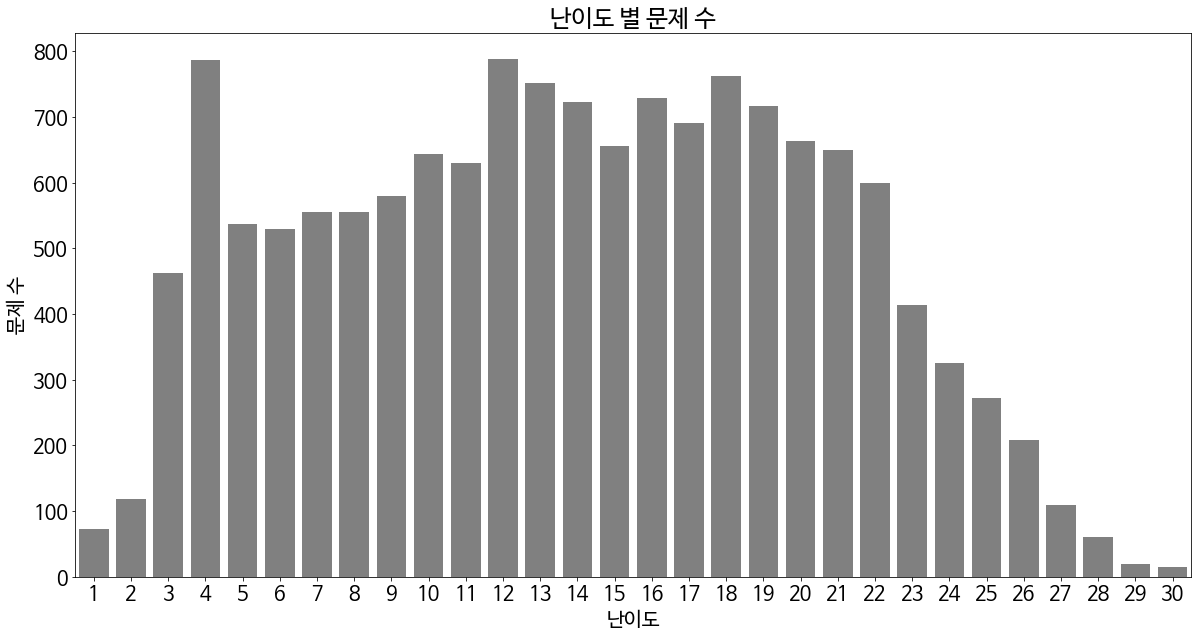

In [ ]:
level_freq = level_freq.drop(level_freq.index[0])
level_freq_plot = sns.barplot(x = level_freq.index, y = 'problemId', data = level_freq, color = 'grey')
level_freq_plot.set_title('난이도 별 문제 수')
level_freq_plot.set_xlabel('난이도')
level_freq_plot.set_ylabel('문제 수')
plt.show()

- 아주 쉬운 문제, 아주 어려운 문제: 문제 수가 적음
- 난이도 구간을 어떻게 나누는 것이 좋을까?



### 1-2) 난이도 별 맞은 사람의 평균



In [ ]:
problemMeta_acceptedUser = problemMeta[['acceptedUserCount', 'level']]
level_avg_acceptedUser = problemMeta_acceptedUser.groupby(['level']).mean()

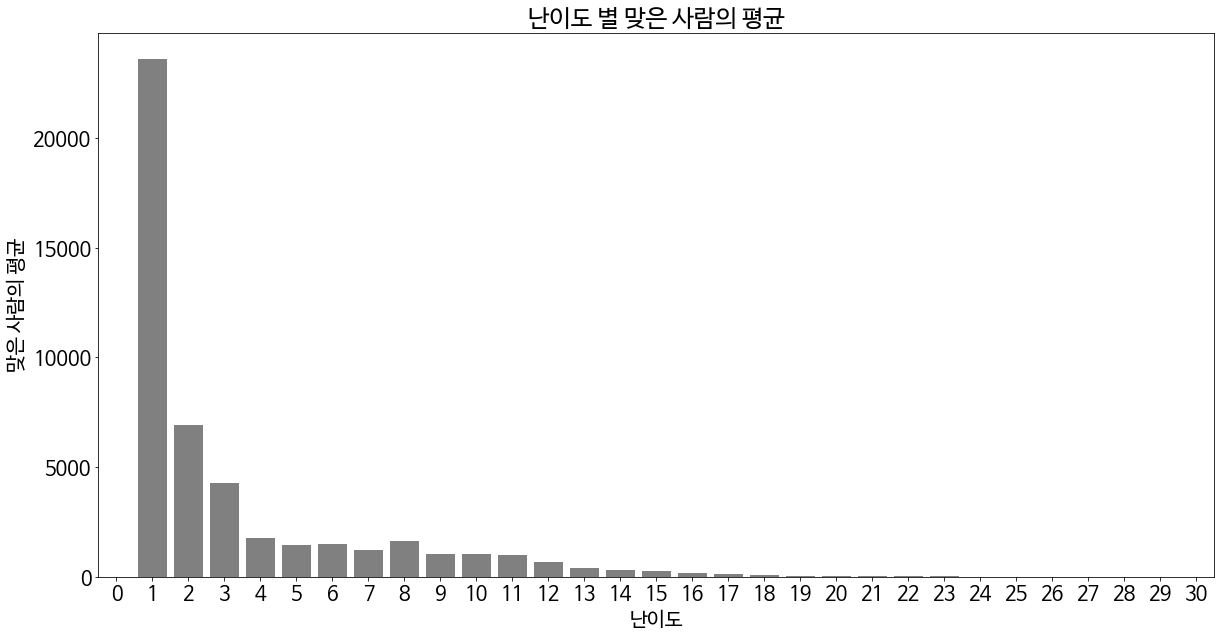

In [ ]:
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_acceptedUser.index, y = 'acceptedUserCount', data = level_avg_acceptedUser, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 맞은 사람의 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('맞은 사람의 평균')
plt.show()

- level 1~3 제외 후 다시 출력

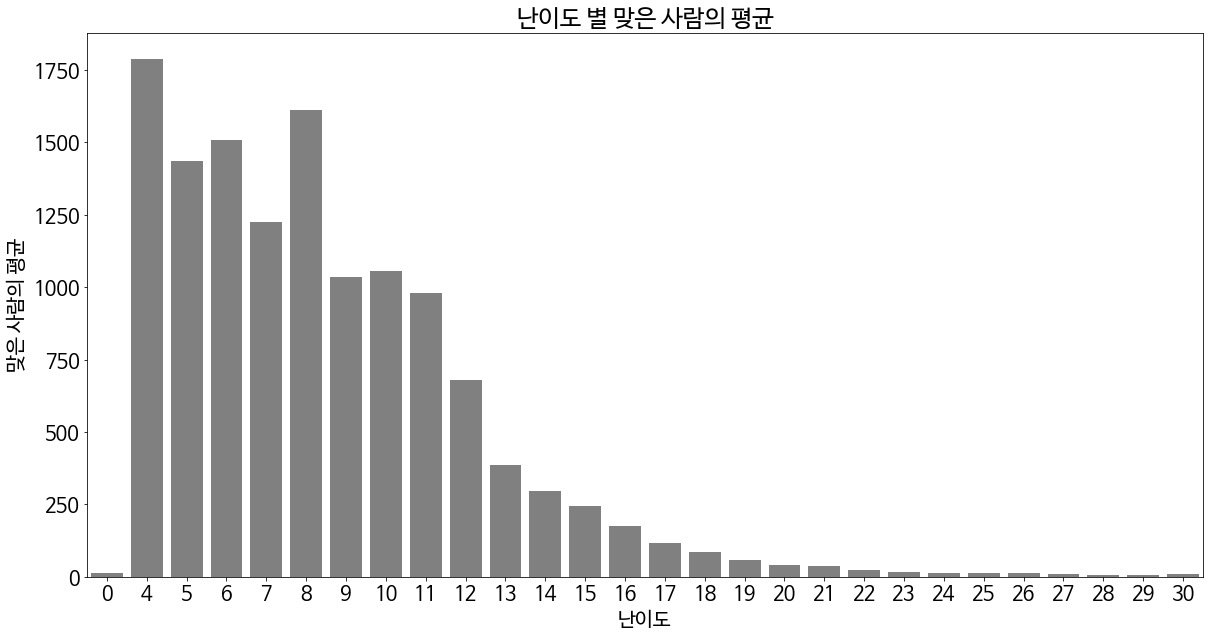

In [ ]:
level_avg_acceptedUser = level_avg_acceptedUser.drop(level_avg_acceptedUser.index[1:4])
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_acceptedUser.index, y = 'acceptedUserCount', data = level_avg_acceptedUser, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 맞은 사람의 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('맞은 사람의 평균')
plt.show()

- 우하향 그래프
  - 문제가 어려울수록 맞은 사람의 수도 적음
  - 난이도가 적절하게 평가되어 있는 것 같음
- 구간
  - level 1-3
  - level 4-8
  - level 9-12
  - level 13-16
  - level 17-21
  - level 22-30

###1-3) 난이도 별 시도 수 평균

In [ ]:
problemMeta_avgTries = problemMeta[['averageTries', 'level']]
level_avg_avgTries = problemMeta_avgTries.groupby(['level']).mean()

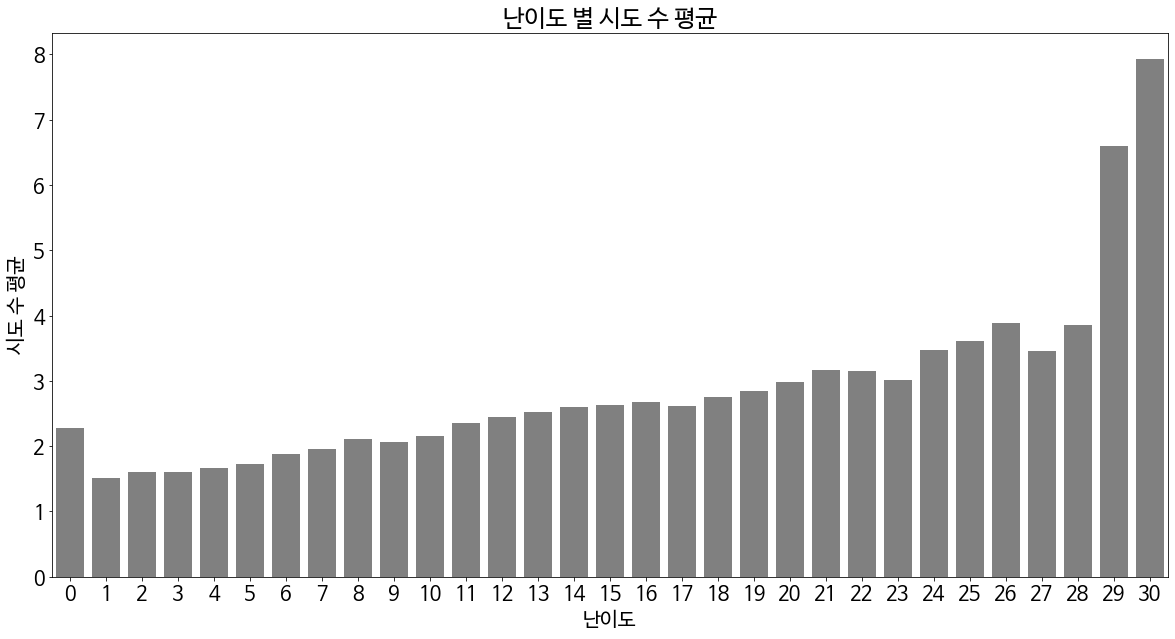

In [ ]:
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_avgTries.index, y = 'averageTries', data = level_avg_avgTries, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 시도 수 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('시도 수 평균')
plt.show()

- 우상향 그래프
  - 문제가 어려울수록 시도 횟수의 평균이 높음

##2) 태그
- 빈도는 problemTagaMeta 항목 참고

### 2-1) 태그 별 빈도

In [ ]:
tag_freq = problemTagMeta[['key', 'problemCount', 'name_kor']]
tag_freq = tag_freq.sort_values(by='problemCount', ascending=False)
tag_freq

,key,problemCount,name_kor
107,math,3749,수학
87,implementation,3353,구현
50,dp,2354,다이나믹 프로그래밍
76,graphs,2198,그래프 이론
36,data_structures,2158,자료 구조
...,...,...,...
149,rb_tree,1,레드-블랙 트리
121,multipoint_evaluation,0,다중 대입값 계산
40,differential_cryptanalysis,0,차분 공격
43,discrete_kth_root,0,이산 k제곱근


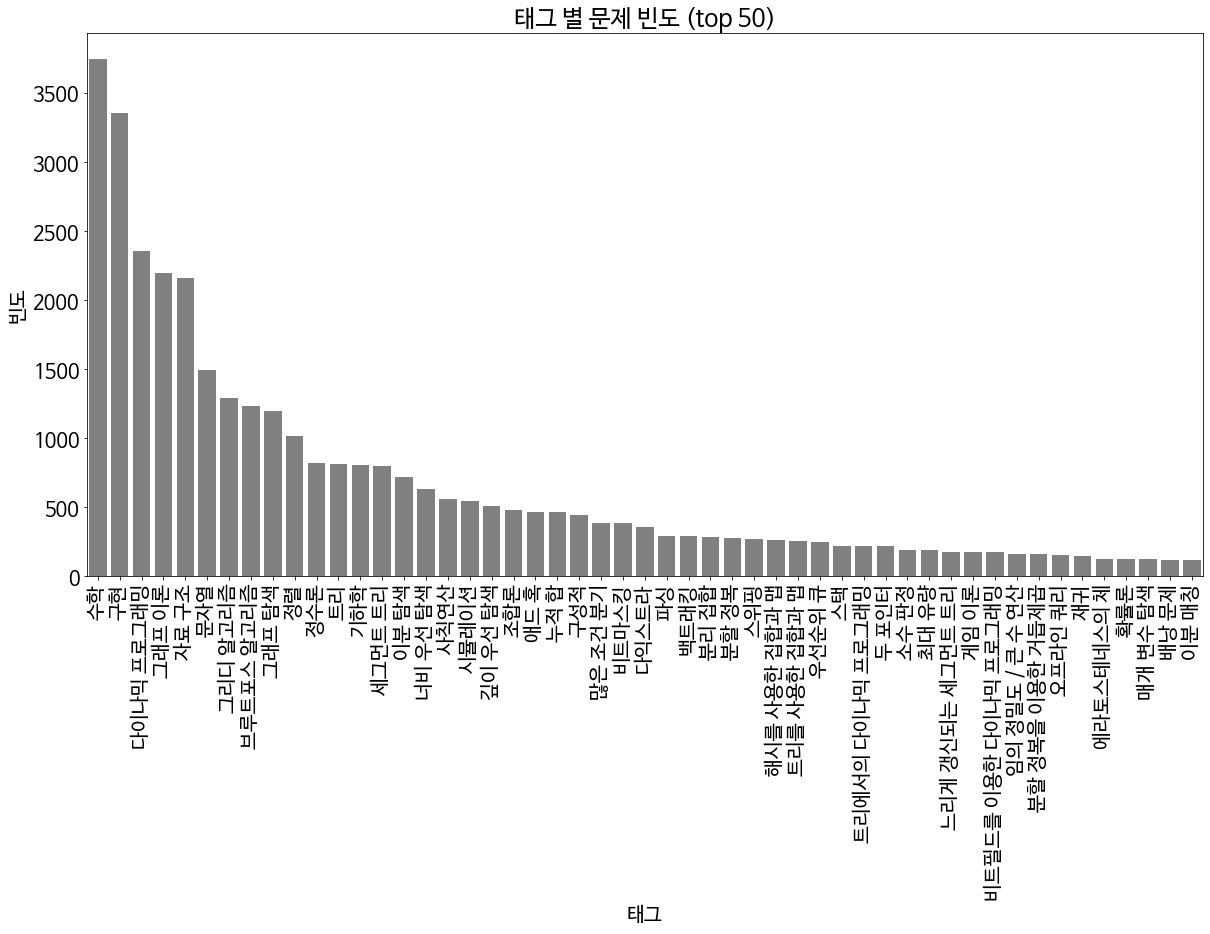

In [143]:
tag_freq_plot = sns.barplot(x = 'name_kor', y = 'problemCount', data = tag_freq[:51], color = 'grey')
tag_freq_plot.set_title('태그 별 문제 빈도 (top 50)')
tag_freq_plot.set_xlabel('태그')
tag_freq_plot.set_ylabel('빈도')
plt.xticks(rotation = 90)
plt.show()

- 수학-구현-DP-그래프-자료구조 순으로 많음

In [ ]:
problemMeta_tag = problemMeta[['tags', 'level']]
tag_basket_freq = problemMeta_tag.groupby(['tags']).count()
tag_basket_freq = tag_basket_freq.sort_values(by='level', ascending=False)

for i, tags in enumerate(tag_basket_freq.iterrows()):
  tags = tags[0]
  tags_list = ast.literal_eval(tags)
  result = []
  for tag in tags_list:
    result.append(problemTagMeta[problemTagMeta['key']==tag]['name_kor'].tolist()[0])
  tag_basket_freq = tag_basket_freq.rename(index={tags: str(result)})

In [ ]:
tag_basket_freq

,level
tags,
[],8988
['다이나믹 프로그래밍'],650
['구현'],598
"['문자열', '구현']",405
['수학'],258
...,...
"['자료 구조', '세그먼트 트리', '이분 탐색', '정렬', '그리디 알고리즘']",1
"['이분 탐색', '가장 긴 증가하는 부분 수열: O(n log n)', '기하학']",1
"['자료 구조', '세그먼트 트리', '다익스트라', '그래프 이론', '우선순위 큐']",1


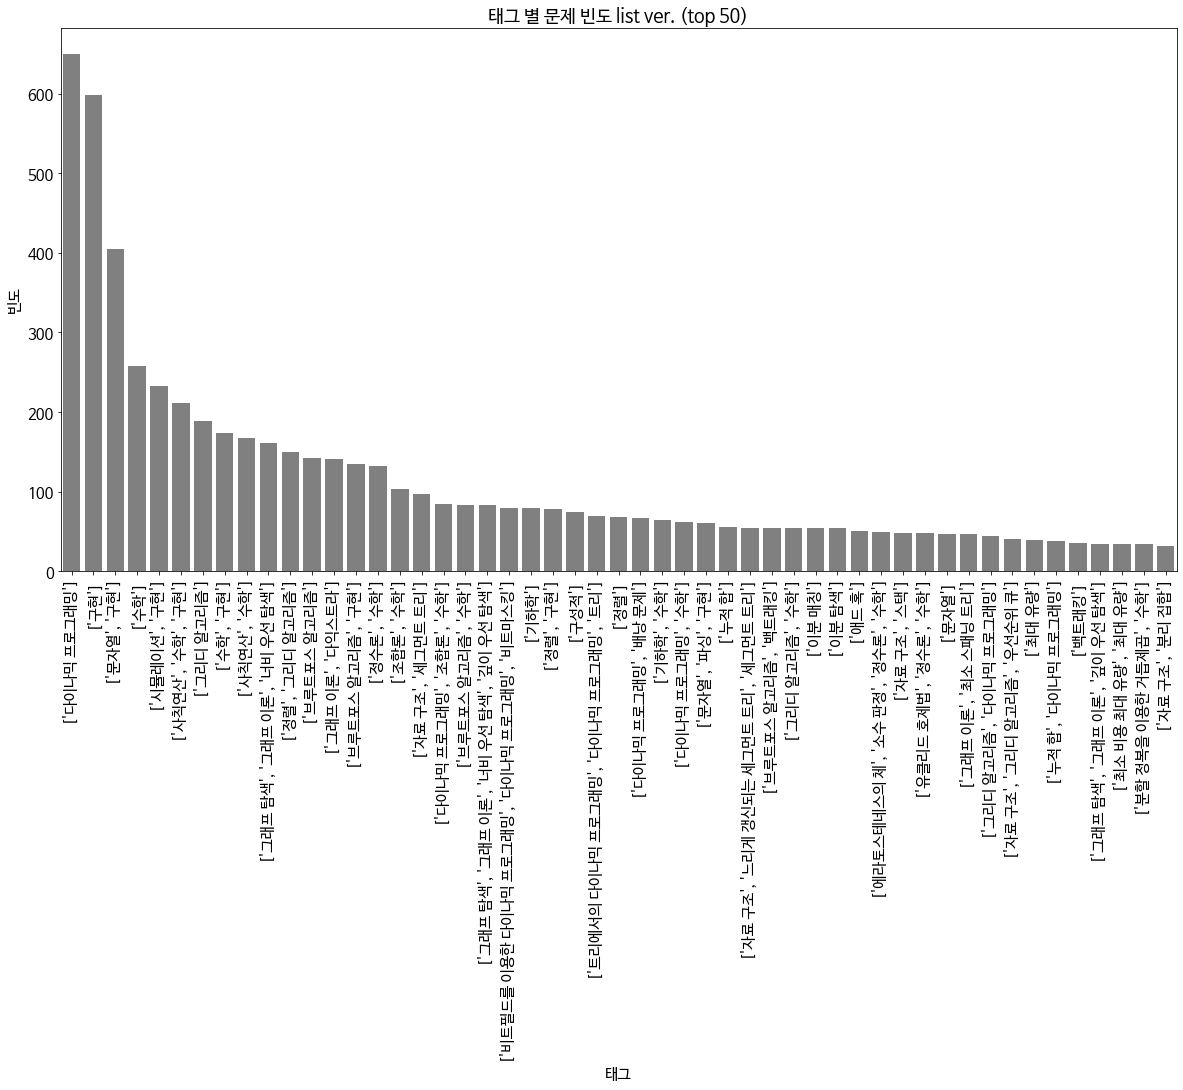

In [144]:
tag_basket_freq_dropped = tag_basket_freq.drop(tag_basket_freq.index[0])
tag_basket_freq_plot = sns.barplot(x = tag_basket_freq_dropped.index[:51], y = 'level', data = tag_basket_freq_dropped[:51], color = 'grey')
tag_basket_freq_plot.set_title('태그 별 문제 빈도 list ver. (top 50)')
tag_basket_freq_plot.set_xlabel('태그')
tag_basket_freq_plot.set_ylabel('빈도')
plt.xticks(rotation = 90)
plt.rc('font', family=font_name, size=15)
plt.show()

###2-2) 태그 별 평균 난이도

KeyboardInterrupt: ignored

# solvedProblem.csv

- ```handle```: 백준 id 
- ```count```: 해결한 문제 수
- ```problemIds```: 해결한 문제 id

In [ ]:
solvedProblem = pd.read_csv(os.path.join(DATA_DIR, "solvedProblem.csv"))
solvedProblem = solvedProblem[['handle', 'count', 'problemIds']]
solvedProblem

,handle,count,problemIds
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643..."
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106..."
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,..."
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10..."
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,..."
...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]"
59889,zzzzong123,3.0,"[1931, 10868, 1158]"
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2..."
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10..."


In [ ]:
solvedProblem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   handle      59893 non-null  object 
 1   count       59893 non-null  float64
 2   problemIds  59893 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


총 **59893** 개의 사용자 데이터

###1) 사용자들이 푼 문제 describe

###2) 난이도